(0, 0) (1, 0) (0, 1)
(0, 1) (1, 1) (0, 2)
(0, 2) (1, 2) (0, 3)
(0, 3) (1, 3) (0, 4)
(0, 4) (1, 4)
(1, 0) (2, 0) (1, 1)
(1, 1) (2, 1) (1, 2)
(1, 2) (2, 2) (1, 3)
(1, 3) (2, 3) (1, 4)
(1, 4) (2, 4)
(2, 0) (3, 0) (2, 1)
(2, 1) (3, 1) (2, 2)
(2, 2) (3, 2) (2, 3)
(2, 3) (3, 3) (2, 4)
(2, 4) (3, 4)
(3, 0) (4, 0) (3, 1)
(3, 1) (4, 1) (3, 2)
(3, 2) (4, 2) (3, 3)
(3, 3) (4, 3) (3, 4)
(3, 4) (4, 4)
(4, 0) (4, 1)
(4, 1) (4, 2)
(4, 2) (4, 3)
(4, 3) (4, 4)
(4, 4)


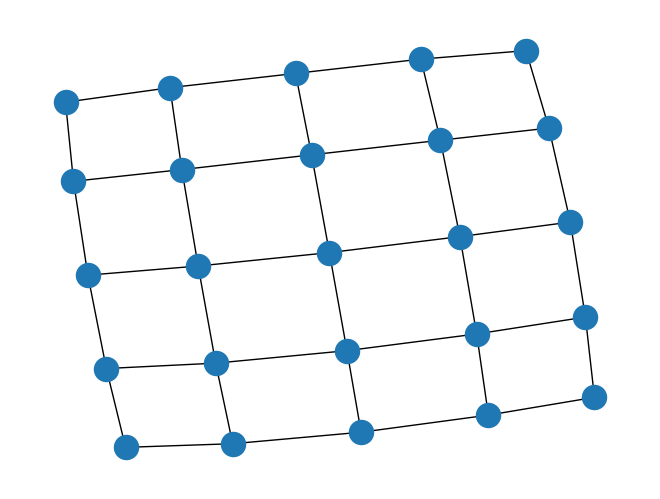

In [18]:
import sys
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.linalg import expm
from ipywidgets import interact, FloatSlider
from IPython.display import display


G = nx.grid_2d_graph(5, 5)  # 5x5 grid

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

nx.draw(H)
plt.show()

C:\Users\zohal\AppData\Local\Temp\ipykernel_22388\1103906607.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  classical_probabilities_over_time[:, i] = classical_state


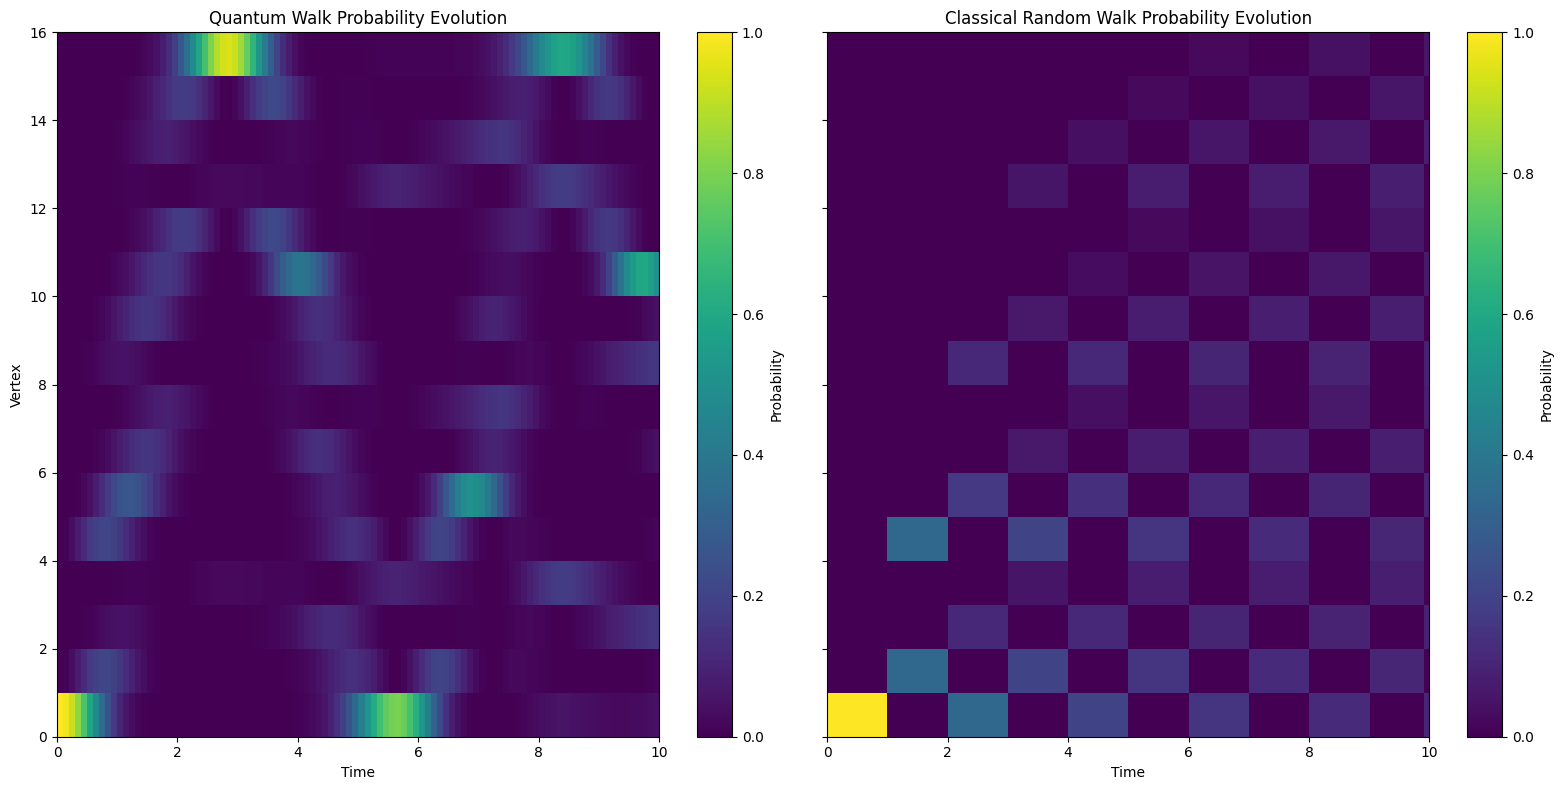

In [86]:

G = nx.grid_2d_graph(4, 4)
n = len(G.nodes())

# Defining the adjacency matrix as the Hamiltonian
H = nx.adjacency_matrix(G).todense()

# Initial state: walker starts at vertex 0
initial_state = np.zeros(n, dtype=complex)
initial_state[0] = 1.0

# Time evolution via Unitary operator U(t) = e^(-iHt)
def time_evolution(H, initial_state, t):
    U = expm(-1j * H * t)  
    return U @ initial_state

# Defining the transition matrix for the classical random walk
P = nx.to_numpy_array(G) / np.sum(nx.to_numpy_array(G), axis=1, keepdims=True)

# Time evolution function for classical random walk
def classical_random_walk(initial_state, P, t):
    """
    Function to simulate a classical random walk on a line

    Parameters:
    initial_state (numpy.ndarray): The number of steps to take in the walk.
    P()

    Returns:
    numpy.ndarray: The probability distribution of the position at each step for each position.
    """   
    state = initial_state.copy()
    for _ in range(int(t)):
        state = P @ state
    return state

# Define time range and calculate probabilities over this range
time_range = np.linspace(0, 10, 100)  # Time from 0 to 10 with 100 steps
quantum_probabilities_over_time = np.zeros((n, len(time_range)))
classical_probabilities_over_time = np.zeros((n, len(time_range)))

# Calculate the probability distributions over time for both quantum and classical walks
for i, t in enumerate(time_range):
    # Quantum walk
    evolved_state = time_evolution(H, initial_state, t)
    quantum_probabilities_over_time[:, i] = np.abs(evolved_state)**2
    
    # Classical random walk
    classical_state = classical_random_walk(initial_state, P, t)
    classical_probabilities_over_time[:, i] = classical_state

# Function to plot the 2D heatmap of probability evolution for both walks
def plot_probability_evolution():
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
    
    # Quantum walk heatmap
    im1 = axes[0].imshow(quantum_probabilities_over_time, aspect='auto', cmap='viridis', origin='lower',
                        extent=[time_range.min(), time_range.max(), 0, n])
    axes[0].set_title('Quantum Walk Probability Evolution')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Vertex')
    fig.colorbar(im1, ax=axes[0], label='Probability')
    
    # Classical walk heatmap
    im2 = axes[1].imshow(classical_probabilities_over_time, aspect='auto', cmap='viridis', origin='lower',
                        extent=[time_range.min(), time_range.max(), 0, n])
    axes[1].set_title('Classical Random Walk Probability Evolution')
    axes[1].set_xlabel('Time')
    fig.colorbar(im2, ax=axes[1], label='Probability')
    
    plt.tight_layout()
    plt.show()


plot_probability_evolution()


In [87]:


# Function to update the plot based on the slider value
def update_plot(t):
    # Compute the probability distribution for quantum and classical walks
    evolved_state = time_evolution(H, initial_state, t)
    quantum_probabilities = np.abs(evolved_state)**2
    
    classical_state = classical_random_walk(initial_state, P, t)
    classical_probabilities = classical_state

    # Create a figure with two subplots
    plt.figure(figsize=(12, 6))

    # Quantum walk subplot
    plt.subplot(1, 2, 1)
    pos = dict((n, n) for n in G.nodes())
    nx.draw(G, pos, node_color=quantum_probabilities, cmap=plt.cm.viridis,
            with_labels=True, node_size=600, font_color='white')
    plt.title(f'Quantum Walk at t = {t:.2f}')
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), ax=plt.gca(), orientation='horizontal')

    # Classical walk subplot
    plt.subplot(1, 2, 2)
    nx.draw(G, pos, node_color=classical_probabilities, cmap=plt.cm.plasma,
            with_labels=True, node_size=600, font_color='white')
    plt.title(f'Classical Walk at t = {t:.2f}')
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), ax=plt.gca(), orientation='horizontal')

    plt.tight_layout()
    plt.show()

# Create a slider for time
time_slider = FloatSlider(min=0, max=10, step=0.1, value=0, description='Time')

# Use the interact function to link the slider to the plot update
interact(update_plot, t=time_slider)



interactive(children=(FloatSlider(value=0.0, description='Time', max=10.0), Output()), _dom_classes=('widget-i…

<function __main__.update_plot(t)>

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9


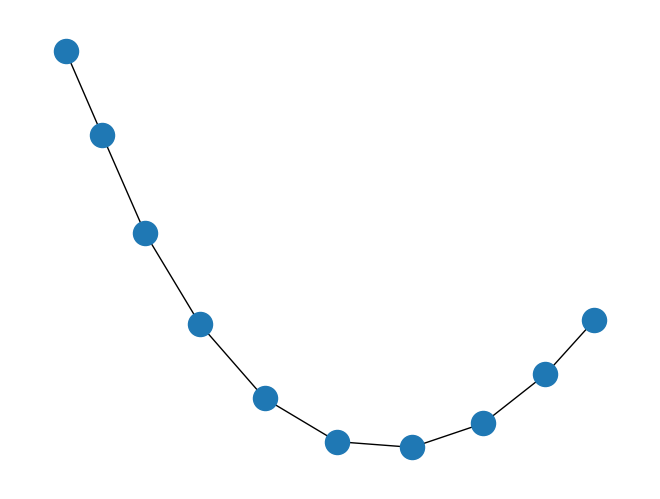

In [58]:
G = nx.path_graph(10)
nx.draw(G)
#print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")
plt.show()

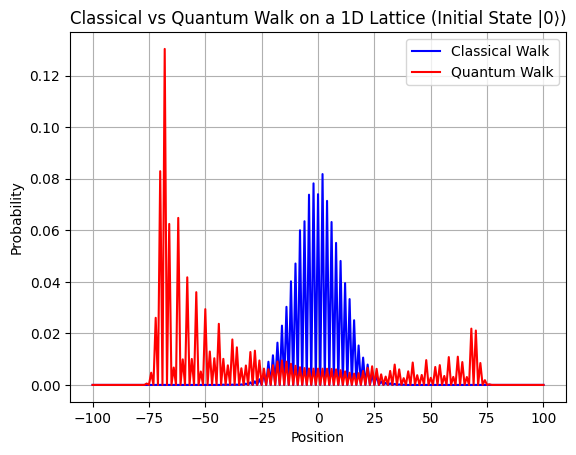

In [84]:

# Classical random walk on a 1D lattice
def classical_random_walk(steps, num_walkers):


    """
    Function to simulate a classical random walk on a line

    Parameters:
    steps(int): The number of steps to take in the walk.
    num_walkers (int): The number of walkers to simulate for averagig the distribution.

    Returns:
    numpy.ndarray: The probability distribution of the position at each step for each position.
    """   

    position_counts = np.zeros(2 * steps + 1)
    for _ in range(num_walkers):
        position = steps  # Start at position 0 (centered at index `steps`)
        for _ in range(steps):
            position += np.random.choice([-1, 1])
        position_counts[position] += 1
    return position_counts / num_walkers  # Normalize to get probabilities

def quantum_walk(steps):
    """
    Function to simulate a Quantum walk on a line

    Parameters:
    steps(int): The number of steps to take in the walk.
    Returns:
    numpy.ndarray: The probability distribution of the position at each step for each position.
    """   
    # Initialize position and coin states
    position_states = np.zeros((2 * steps + 1, 2), dtype=complex)
    # Start at position 0 with coin state |0⟩
    position_states[steps, 0] = 1

    # Hadamard coin operator
    hadamard = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
    
    for _ in range(steps):
        new_states = np.zeros_like(position_states)
        for i in range(1, len(position_states) - 1):
            new_states[i-1, 0] += hadamard[0, 0] * position_states[i, 0] + hadamard[0, 1] * position_states[i, 1]
            new_states[i+1, 1] += hadamard[1, 0] * position_states[i, 0] + hadamard[1, 1] * position_states[i, 1]
        position_states = new_states
    
    return np.sum(np.abs(position_states)**2, axis=1)

# Parameters
steps = 100
num_walkers = 10000

# Perform walks
classical_dist = classical_random_walk(steps, num_walkers)
quantum_dist = quantum_walk(steps)

# Plot the results
positions = np.arange(-steps, steps + 1)
plt.plot(positions, classical_dist, label='Classical Walk', color='blue')
plt.plot(positions, quantum_dist, label='Quantum Walk', color='red')
plt.title('Classical vs Quantum Walk on a 1D Lattice (Initial State |0⟩)')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()
